In [1]:
import json
import requests
import pandas as pd

header = {"Content-Type": "application/json"}

C:\Users\xuexiaolei\AppData\Local\Temp\ipykernel_31980\2044947276.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
req = {
	"template_id": "123456",
	"model_id": "123456",
	"namespace": "u1",
	"tag_table": [{
			"tag_name": "$(1)",
			"tag_description": "xxx电流"
		},
		{
			"tag_name": "$(2)",
			"tag_description": "xxx电压"
		},
		{
			"tag_name": "$(3)",
			"tag_description": "xxx流量"
		},
		{
			"tag_name": "$(4)",
			"tag_description": "xxx浓度"
		}
	],
	"task_config": {
		"filename": "4-NOX.csv",
		"uuid": "11111111111",
		"step": "down_sampling",
		"features": [
			"HSA11CQ1511",
			"HSA11CQ152",
			"TCF_R",
			"TAF",
			"HSK11CF001",
			"HSK21CQ101",
			"AMHSG21DP101",
			"HSA21CQ152"
		],
		"labels": [
			"HSA21CQ151CAL"
		],
		"down_sampling": {},
		"missing_value": [{
				"tag_name": "HSA11CQ1511",
				"config": {
					"algorithm": "mean",
					"param": {
						"window_size": 20
					}
				}
			},
			{
				"tag_name": "TCF_R",
				"config": {
					"algorithm": "mean",
					"param": {
						"window_size": 20
					}
				}
			}
		],
		"filtering": [{
				"tag_name": "TCF_R",
				"config": {
					"algorithm": "mean",
					"param": {
						"window_size": 15
					}
				}
			},
			{
				"tag_name": "HSK11CF001",
				"config": {
					"algorithm": "median",
					"param": {
						"kernel_size": 15
					}
				}
			}
		],
		"outlier": [{
			"tag_name": "HSK11CF001",
			"config": {
				"outlier": {
					"algorithm": "hampel",
					"param": {
						"kernel_size": 5
					}
				},
				"interpolation": {
					"algorithm": "linear",
					"param": {
						"kernel_size": 5
					}
				}
			}
		}],
		"feature_construct": {
			"diff": [
				"AMHSG21DP101"
			],
			"lags": [{
				"tag_name": "AMHSG21DP101",
				"max_lag": 2,
				"lag": 1
			}],
			"window": [{
				"tag_name": "HSA21CQ152",
				"win_size": 20,
				"aggregate": "mean"
			}],
			"function": [{
					"name": "func1",
					"formula": "$(4)+$(2)+$(3)"
				},
				{
					"name": "func2",
					"formula": "log($(2))"
				}
			],
			"boxcox": [
            	"HSA21CQ152"
            ]
		},
		"train": {
			"algorithm": "lightgbm",
			"opt_hp": {
				"symbol": 0,
				"init_points": 5,
				"n_iter": 5,
				"search_space": {
					"n_estimators": {
						"upper": 500,
						"lower": 20,
						"data_type": "int"
					},
					"max_depth": {
						"upper": 100,
						"lower": 1,
						"data_type": "int"
					},
					"num_leaves": {
						"upper": 20,
						"lower": 2,
						"data_type": "int"
					},
					"learning_rate": {
						"upper": 0.2,
						"lower": 0.001,
						"data_type": "float"
					}
				}
			},
			"opt_quantile": {
				"symbol": 0,
				"default": 0.95,
				"k": 1,
				"init_points": 5,
				"n_iter": 5,
				"search_space": {
					"alpha": {
						"upper": 0.99,
						"lower": 0.5,
						"data_type": "float"
					}
				}
			},
			"test_size": 0.1,
			"model_file": "",
			"best_params": {

			},
			"label_diff": 0,
			"train_features": [
				"HSA11CQ1511",
				"HSA11CQ152",
				"TCF_R",
				"TAF",
				"HSK11CF001",
				"HSK21CQ101",
				"AMHSG21DP101",
				"HSA21CQ152"
			],
			"train_labels": [
				"HSA21CQ151CAL"
			]
		}
	}
}

base_url = "http://192.168.253.99:5001/automl/"

header = {"Content-Type": "application/json"}

In [103]:
# >> init
init_req = {
  "filename": "4-NOX.csv"
}
res = requests.post(base_url+'initdata', json=init_req, headers=header)
res = json.loads(res.content)
uuid = res['data']['uuid']
uuid

'3d9a9751-9240-4d21-9636-559d8ceefb6f'

In [104]:
# >> down sample
down_sampling = {
  "uuid": uuid,
  "current": "down_sample",
  "down_sampling": req['task_config']['down_sampling']
}
res = requests.post(base_url+'down_sampling', json=down_sampling, headers=header)
json.loads(res.content)

{'message': '降采样成功', 'status': 0}

In [105]:
# >> nan
nan_req = {
  "uuid": uuid,
  "current": "nan",
  "missing_value": req['task_config']['missing_value']
}
res = requests.post(base_url+'missing_value', json=nan_req, headers=header)

In [106]:
# >> filter
filter_req = {
  "uuid": uuid,
  "current": "filter",
  "filtering": req['task_config']['filtering']
}
res = requests.post(base_url+'filtering', json=filter_req, headers=header)

In [107]:
# >> outlier
outlier_req = {
  "uuid": uuid,
  "current": "outlier",
  "outlier": req['task_config']['outlier']
}
res = requests.post(base_url+'outlier', json=outlier_req, headers=header)

In [108]:
# >> feature_construct
feature_construct_req = {
  "uuid": uuid,
  "current": "feature_construct",
  "feature_construct": req['task_config']['feature_construct']
}
res = requests.post(base_url+'feature_construct', json=feature_construct_req, headers=header)

In [109]:
# >> train
train_req = {
    "model_id": req['model_id'],
    "task_config": {
        "uuid": uuid,
        "current": "train",
        "train": req['task_config']['train']
    }
}
res = requests.post(base_url+'train', json=train_req, headers=header)

In [4]:
# >> automl
res = requests.post(base_url+'automl', json=req, headers=header)
json.loads(res.content)

ConnectionError: HTTPConnectionPool(host='192.168.253.99', port=5001): Max retries exceeded with url: /automl/automl (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001F66B9055E0>: Failed to establish a new connection: [WinError 10061] 由于目标计算机积极拒绝，无法连接。'))

In [2]:
csv_data = pd.read_csv("D:\\Desktop\\工作文件\\数据\\yanghuopan\\4-NOX出口浓度_new.csv")
csv_data = csv_data.iloc[:1000, :]
T = pd.infer_freq(pd.to_datetime(csv_data['time'], format="%y/%m/%d %H:%M:%S"))
csv_data.head()

,time,HSA11CQ1511,HSA11CQ152,TCF_R,TAF,HSK11CF001,HSK21CQ101,AMHSG21DP101,HSA21CQ152,HSA21CQ151CAL
0,23/02/15 00:00:00,197.195,3.694,234.427,1943.896,203.209,-0.003,2232.334,3.081,16.170
1,23/02/15 00:00:20,195.092,3.628,234.414,1942.913,199.513,-0.003,2233.408,3.007,16.025
2,23/02/15 00:00:40,195.588,3.577,234.595,1934.630,202.743,-0.003,2231.460,2.973,16.061
3,23/02/15 00:01:00,195.721,3.521,234.728,1948.745,204.631,-0.003,2235.671,3.012,16.266
4,23/02/15 00:01:20,194.495,3.660,234.849,1943.946,196.340,-0.003,2230.612,3.045,16.300


In [4]:
# >> inference
for i in range(500, 550):
	json_data = {
		"T": T,
		"columns": list(csv_data.columns)
	}
	get_data = {
		"taskcode": "1800472274055200768",
	}
	json_data['data'] = list(csv_data.iloc[i, :])

	base_url = "http://localhost:5002/"
	req_url = base_url + "inference/inference" + "?taskcode=1801451706802765824"
	res = requests.post(req_url, json=json_data, headers=header)
	print(json.loads(res.content))

{'message': 'data length is too short, please request again.', 'status': -1}
{'message': 'data length is too short, please request again.', 'status': -1}
{'message': 'data length is too short, please request again.', 'status': -1}
{'data': 15.804159317631417, 'message': 'success', 'status': 0}
{'data': 15.840988872248094, 'message': 'success', 'status': 0}
{'data': 15.596892698253447, 'message': 'success', 'status': 0}
{'data': 15.671722926688465, 'message': 'success', 'status': 0}
{'data': 15.642242665553152, 'message': 'success', 'status': 0}
{'data': 15.537372912975552, 'message': 'success', 'status': 0}
{'data': 15.392702250921502, 'message': 'success', 'status': 0}
{'data': 15.58050930768249, 'message': 'success', 'status': 0}
{'data': 15.974462755301667, 'message': 'success', 'status': 0}
{'data': 15.745207958609384, 'message': 'success', 'status': 0}
{'data': 15.800497167270704, 'message': 'success', 'status': 0}
{'data': 15.640527040033566, 'message': 'success', 'status': 0}
{'

In [ ]:
{
  "T": "20S",
  "columns": [
"time",
				"HSA11CQ1511",
				"HSA11CQ152",
				"TCF_R",
				"TAF",
				"HSK11CF001",
				"HSK21CQ101",
				"AMHSG21DP101",
				"HSA21CQ152"
			],
  "data": [
    "23/02/15 00:00:00",197.195,3.694,234.427,1943.896,203.209,-0.003,2232.334,3.081,16.170
  ]
}
1800472274055200768

In [1]:
%pip install openai

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/326.8 kB ? eta -:--:--
     --- ----------------------------------- 30.7/326.8 kB 1.3 MB/s eta 0:00:01
     -------- ---------------------------- 71.7/326.8 kB 975.2 kB/s eta 0:00:01
     ---------------------- --------------- 194.6/326.8 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 326.8/326.8 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/75.6 kB ? eta -:--:--
     --------------------- ------------------ 41.0/75.6 kB ? eta -:--:--
     -------------------------------------- 75.6/75.6 kB 827.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/77.9 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/77.9 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/77.9 kB ? eta -:--:--
     -------------------------------------- 77.9/77.9 kB 720.1 kB/s eta 0:00:00
Note: you may need to r

In [26]:
import os
import openai
import httpx

proxies = {
    "http://": "http://localhost:7890",
}
httpx_client= httpx.Client(proxies=proxies)

'sk-proj-EdyvZtZq0dQepOmZespUT3BlbkFJ709MRK48H1CEsoHBH8y0'
client = openai.OpenAI(api_key='sk-proj-EdyvZtZq0dQepOmZespUT3BlbkFJ709MRK48H1CEsoHBH8y0', http_client=httpx_client)

def chat_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()


chat_gpt("aa")

APITimeoutError: Request timed out.

<!doctype html><html lang="en-SG"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>chatgpt - Google Search</title><script nonce="MW6l-DPXQktAkDz840b9rA">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a=c==="1"||c==="q"&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if(a.tagName==="A"){a=a.getAttribute("data-nohref")==="1";break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=google.stvsc&&google.stvsc.rs,f=a?d||window
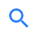
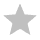
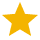

In [27]:
import requests

proxies = {
    "http": "http://localhost:7890",
}

response = requests.get("http://www.google.com/search?q=chatgpt&oq=&gs_lcrp=EgZjaHJvbWUqCQgAEEUYOxjCAzIJCAAQRRg7GMIDMgkIARBFGDsYwgMyCQgCEEUYOxjCAzIJCAMQRRg7GMIDMgkIBBBFGDsYwgMyCQgFEEUYOxjCAzIJCAYQRRg7GMIDMgkIBxBFGDsYwgPSAQg4NTdqMGoxNagCCLACAQ&sourceid=chrome&ie=UTF-8", proxies=proxies)
print(response.text)
# response = requests.post(
#     'https://api.openai.com/v1/engines/davinci/completions',
#     headers={
#         'Content-Type': 'application/json',
#         'Authorization': f'sk-proj-EdyvZtZq0dQepOmZespUT3BlbkFJ709MRK48H1CEsoHBH8y0'
#     },
#     json={
#         "prompt": "Hello, how are you?",
#         "max_tokens": 50
#     },
#     proxies=proxies
# )

# print(response.json())